## Dataset Overview

High-level summary of the merged suicide risk dataset used for model training and analysis.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_path = r"C:\Users\nurbe\OneDrive\Desktop\open_source_data_v1\suicide_final_project\final\all_data_cleaned.csv"
df = pd.read_csv(df_path)

In [12]:
print(df.shape)
df.head()

(774755, 6)


,text,label,source,source_link,clean_text,language
0,Ex Wife Threatening SuicideRecently I left my ...,1,huggingface_jquiros_suicide_path,https://huggingface.co/datasets/jquiros/suicid...,ex wife threatening suiciderecently i left my ...,eng
1,Am I weird I don't get affected by compliments...,0,huggingface_jquiros_suicide_path,https://huggingface.co/datasets/jquiros/suicid...,am i weird i don t get affected by compliments...,eng
2,Finally 2020 is almost over... So I can never ...,0,huggingface_jquiros_suicide_path,https://huggingface.co/datasets/jquiros/suicid...,finally is almost over... so i can never hear ...,eng
3,i need helpjust help me im crying so hard,1,huggingface_jquiros_suicide_path,https://huggingface.co/datasets/jquiros/suicid...,i need helpjust help me im crying so hard,eng
4,"I’m so lostHello, my name is Adam (16) and I’v...",1,huggingface_jquiros_suicide_path,https://huggingface.co/datasets/jquiros/suicid...,"i m so losthello, my name is adam and i ve bee...",eng


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774755 entries, 0 to 774754
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         774755 non-null  object
 1   label        774755 non-null  int64 
 2   source       774755 non-null  object
 3   source_link  774755 non-null  object
 4   clean_text   774755 non-null  object
 5   language     774755 non-null  object
dtypes: int64(1), object(5)
memory usage: 35.5+ MB


In [ ]:
# Basic statistics for text length (clean_text) in characters and words
df["len_chars"] = df["clean_text"].fillna("").str.len()
df["len_words"] = df["clean_text"].fillna("").str.split().apply(len)

df[["len_chars", "len_words"]].describe()

,len_chars,len_words
count,774755.000000,774755.000000
mean,578.844328,105.707817
std,1070.869484,190.440599
min,1.000000,1.000000
25%,100.000000,18.000000
50%,255.000000,46.000000
75%,663.000000,121.000000
max,176363.000000,18146.000000


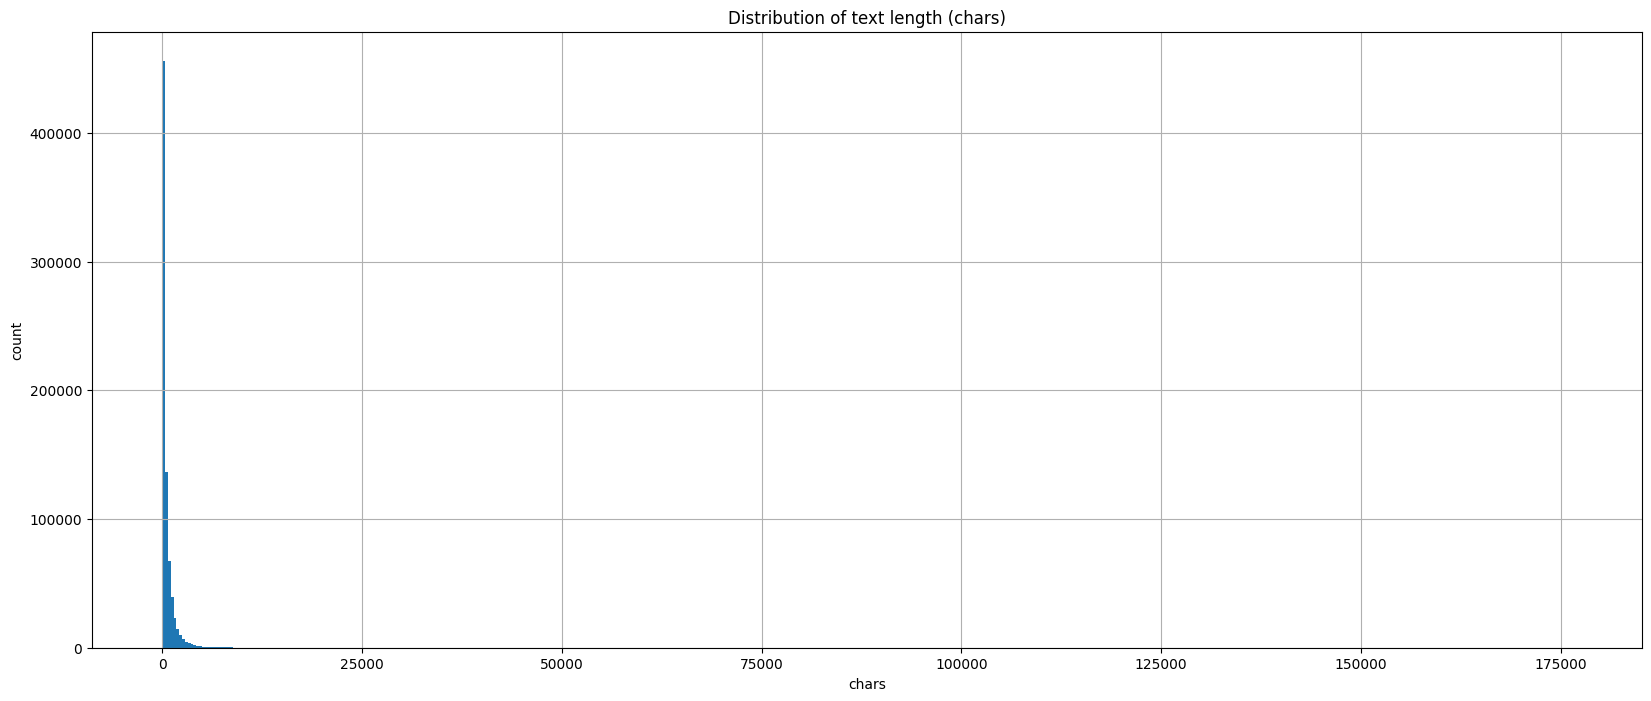

In [ ]:
# Histogram of text length (characters)
plt.figure(figsize=(20, 8))
df["len_chars"].hist(bins=500)
plt.title("Distribution of text length (characters)")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()

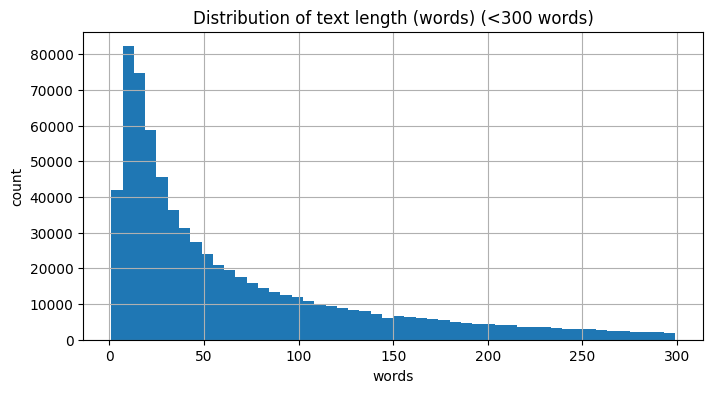

In [75]:
plt.figure(figsize=(8, 4))
df[df["len_words"] < 300]["len_words"].hist(bins=50)
plt.title("Distribution of text length (words) (<300 words)")
plt.xlabel("words")
plt.ylabel("count")
plt.show()

In [ ]:
# Descriptive statistics of text length (chars/words) grouped by label

df.groupby("label")[["len_chars", "len_words"]].describe()

len_chars                                                               \
          count        mean          std  min    25%    50%    75%       max   
label                                                                          
0      390741.0  426.658318  1068.357806  1.0   73.0  146.0  389.0  176363.0   
1      384014.0  733.696269  1051.040468  1.0  181.0  421.0  895.0   40186.0   

      len_words                                                           
          count        mean         std  min   25%   50%    75%      max  
label                                                                     
0      390741.0   75.072836  173.890851  1.0  13.0  26.0   70.0  18146.0  
1      384014.0  136.879450  201.187266  1.0  32.0  77.0  166.0   9684.0

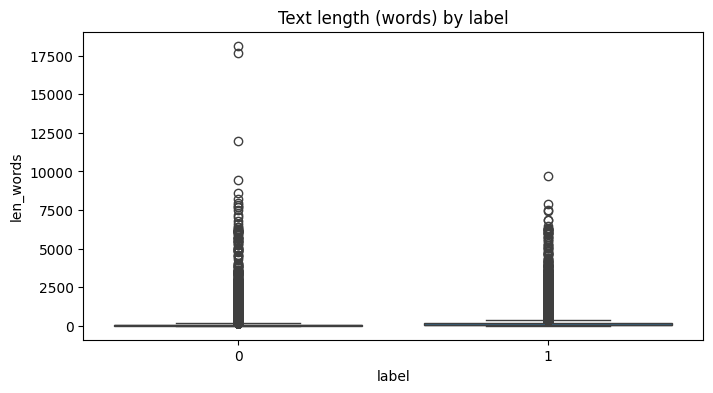

In [77]:
# Boxplot text length (words) by label
plt.figure(figsize=(8, 4))  # Set the size of the figure
sns.boxplot(data=df, x="label", y="len_words")  # Draw a boxplot for text length by label
plt.title("Text length (words) by label")  # Set the title
plt.show()  # Show the plot

In [79]:
! pip install nltk

  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)

   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import re
from nltk.corpus import stopwords
import nltk

# Make sure stopwords are downloaded at least once:
# nltk.download("stopwords")

ru_stop = set(stopwords.words("russian"))
en_stop = set(stopwords.words("english"))

def simple_tokenize(text: str):
    """Simple whitespace tokenizer that keeps only letters and spaces."""
    text = str(text)
    # keep only letters (Latin + Cyrillic) and spaces
    text = re.sub(r"[^a-zA-Zа-яА-ЯёЁ]+", " ", text)
    tokens = text.lower().split()
    return tokens

# Add tokenized version of clean_text for later frequency analysis
df["tokens"] = df["clean_text"].fillna("").apply(simple_tokenize)
df["tokens"].head()

0    [ex, wife, threatening, suiciderecently, i, le...
1    [am, i, weird, i, don, t, get, affected, by, c...
2    [finally, is, almost, over, so, i, can, never,...
3    [i, need, helpjust, help, me, im, crying, so, ...
4    [i, m, so, losthello, my, name, is, adam, and,...
Name: tokens, dtype: object

In [81]:
all_tokens = [t for toks in df["tokens"] for t in toks]
counter_all = Counter(all_tokens)

counter_all.most_common(50)

[('i', 3744050),
 ('to', 1875367),
 ('and', 1594926),
 ('the', 1234558),
 ('a', 1128376),
 ('my', 1030773),
 ('not', 1030746),
 ('it', 899408),
 ('of', 790944),
 ('me', 694865),
 ('that', 693602),
 ('t', 636454),
 ('in', 580735),
 ('you', 542803),
 ('is', 531193),
 ('like', 522289),
 ('but', 517166),
 ('for', 507269),
 ('have', 491513),
 ('m', 461586),
 ('just', 444943),
 ('want', 438639),
 ('this', 418907),
 ('so', 392165),
 ('know', 390170),
 ('feel', 380217),
 ('with', 376255),
 ('was', 374826),
 ('life', 354146),
 ('be', 350536),
 ('и', 342182),
 ('в', 334187),
 ('get', 333872),
 ('s', 329389),
 ('do', 316544),
 ('can', 305798),
 ('on', 302437),
 ('would', 281943),
 ('people', 276556),
 ('time', 274714),
 ('don', 266620),
 ('one', 257967),
 ('even', 257176),
 ('if', 250723),
 ('all', 249876),
 ('about', 244512),
 ('or', 243461),
 ('really', 240250),
 ('what', 228380),
 ('at', 225580)]

In [82]:
df_ru = df[df["language"] == "russian"].copy()
df_ru["tokens"] = df_ru["clean_text"].fillna("").apply(simple_tokenize)

all_tokens_ru = [t for toks in df_ru["tokens"] for t in toks if t not in ru_stop]
counter_ru = Counter(all_tokens_ru)

counter_ru.most_common(50)

[('это', 52654),
 ('очень', 24479),
 ('года', 24192),
 ('лет', 21482),
 ('просто', 19963),
 ('хочу', 19878),
 ('могу', 17441),
 ('жить', 16987),
 ('время', 16114),
 ('жизни', 15903),
 ('день', 15888),
 ('также', 14681),
 ('году', 14106),
 ('жизнь', 13718),
 ('апреля', 13590),
 ('знаю', 13178),
 ('всё', 12172),
 ('области', 11231),
 ('россии', 10429),
 ('которые', 10274),
 ('г', 9594),
 ('год', 9033),
 ('человек', 9002),
 ('всем', 8724),
 ('который', 8721),
 ('работы', 8690),
 ('делать', 8259),
 ('сегодня', 8099),
 ('каждый', 8011),
 ('детей', 8006),
 ('ni', 7970),
 ('мама', 7705),
 ('участие', 7442),
 ('города', 7300),
 ('дома', 6846),
 ('мной', 6644),
 ('рамках', 6576),
 ('хочется', 6535),
 ('будут', 6463),
 ('ещё', 6458),
 ('постоянно', 6381),
 ('людей', 6321),
 ('место', 6302),
 ('работу', 6161),
 ('т', 6089),
 ('своей', 6015),
 ('вообще', 5964),
 ('хотя', 5939),
 ('компании', 5869),
 ('понимаю', 5836)]

In [83]:
ru_tokens_0 = [t for toks in df_ru[df_ru["label"] == 0]["tokens"] for t in toks if t not in ru_stop]
ru_tokens_1 = [t for toks in df_ru[df_ru["label"] == 1]["tokens"] for t in toks if t not in ru_stop]

cnt_ru_0 = Counter(ru_tokens_0)
cnt_ru_1 = Counter(ru_tokens_1)

print("Top Russian tokens, label=0:")
print(cnt_ru_0.most_common(30))

print("\nTop Russian tokens, label=1:")
print(cnt_ru_1.most_common(30))

Top Russian tokens, label=0:
[('это', 20691), ('года', 16156), ('также', 13877), ('апреля', 13530), ('году', 13116), ('области', 11122), ('россии', 10239), ('г', 9403), ('день', 8643), ('время', 8071), ('ni', 7970), ('участие', 7398), ('лет', 7360), ('которые', 7178), ('города', 6857), ('рамках', 6559), ('сегодня', 6300), ('работы', 6065), ('очень', 5904), ('который', 5798), ('будут', 5556), ('место', 5496), ('компании', 5485), ('казахстана', 5450), ('детей', 5424), ('рублей', 5412), ('проекта', 5286), ('развития', 5109), ('республики', 5002), ('франшиза', 4726)]

Top Russian tokens, label=1:
[('это', 31963), ('очень', 18575), ('хочу', 17252), ('могу', 16346), ('просто', 16265), ('жить', 16241), ('лет', 14122), ('знаю', 12416), ('жизни', 11960), ('жизнь', 11328), ('всё', 9471), ('время', 8043), ('года', 8036), ('день', 7245), ('делать', 7188), ('мама', 6926), ('мной', 6118), ('постоянно', 5745), ('хочется', 5673), ('понимаю', 5407), ('всем', 5095), ('каждый', 5094), ('вообще', 4973), (

Top Russian bigrams (label=1):
[(('каждый', 'день'), 1784), (('хочу', 'жить'), 1310), (('знаю', 'делать'), 950), (('хочу', 'умереть'), 864), (('покончить', 'собой'), 774), (('сих', 'пор'), 679), (('моей', 'жизни'), 665), (('twitter', 'com'), 631), (('т', 'д'), 601), (('последнее', 'время'), 576), (('года', 'назад'), 575), (('очень', 'сильно'), 565), (('очень', 'плохо'), 563), (('жить', 'дальше'), 529), (('мысли', 'суициде'), 513), (('вижу', 'смысла'), 455), (('жить', 'хочу'), 397), (('это', 'время'), 389), (('очень', 'тяжело'), 380), (('помогите', 'пожалуйста'), 376), (('могу', 'жить'), 365), (('всё', 'это'), 354), (('друг', 'друга'), 344), (('просто', 'хочу'), 337), (('самом', 'деле'), 333), (('никому', 'нужна'), 327), (('это', 'просто'), 323), (('пол', 'года'), 317), (('своей', 'жизни'), 314), (('дальше', 'жить'), 311)]

Top Russian trigrams (label=1):
[(('pic', 'twitter', 'com'), 145), (('хочу', 'покончить', 'собой'), 85), (('суицида', 'ред', 'мод'), 83), (('покончить', 'жизнь', 'са

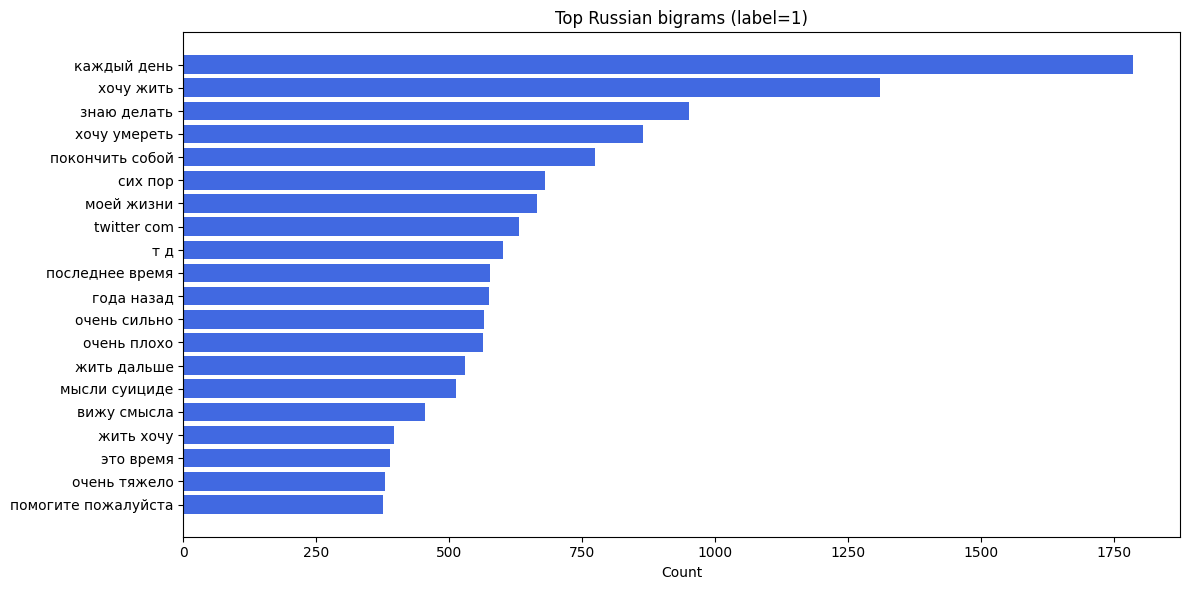

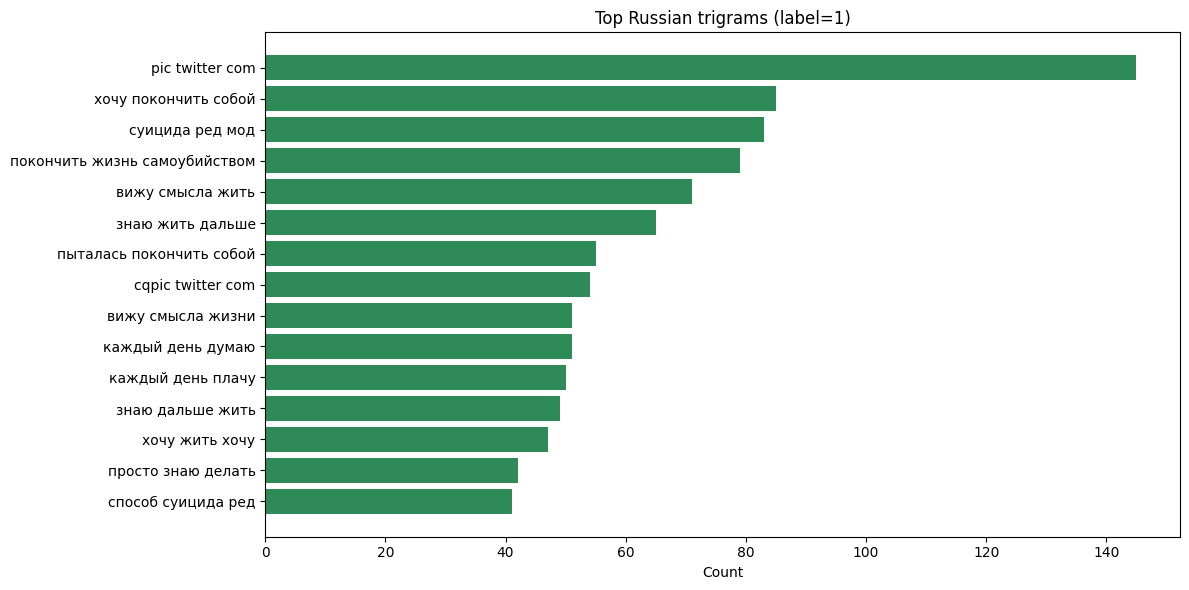

In [85]:
# --- Russian bigrams and trigrams for suicidal (label=1) posts ---
import matplotlib.pyplot as plt

# Utility: create n-grams from tokens
def to_ngrams(tokens, n=2):
    """
    Generate n-grams (as tuples) from an input list of tokens.
    Returns empty list if not enough tokens.
    """
    if len(tokens) < n:
        return []
    iters = [iter(tokens)] * n
    for i in range(n):
        for _ in range(i):
            next(iters[i], None)
    return list(zip(*iters))

# Count bigrams and trigrams, skipping Russian stopwords
bigrams_1 = Counter()
trigrams_1 = Counter()
for toks in df_ru[df_ru["label"] == 1]["tokens"]:
    toks = [t for t in toks if t not in ru_stop]
    bigrams_1.update(to_ngrams(toks, n=2))
    trigrams_1.update(to_ngrams(toks, n=3))

# Print top results
print("Top Russian bigrams (label=1):")
print(bigrams_1.most_common(30))
print("\nTop Russian trigrams (label=1):")
print(trigrams_1.most_common(20))

# --- Visualization of Russian bigrams & trigrams ---
TOP_N_BIGRAM = 20
TOP_N_TRIGRAM = 15

# Show the top N bigrams as bar plot
top_bigrams = bigrams_1.most_common(TOP_N_BIGRAM)
bigram_labels = [' '.join(b) for b, c in top_bigrams]
bigram_counts = [c for b, c in top_bigrams]

plt.figure(figsize=(12, 6))
plt.barh(bigram_labels[::-1], bigram_counts[::-1], color='royalblue')
plt.title('Top Russian bigrams (label=1)')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# Show the top N trigrams as bar plot
top_trigrams = trigrams_1.most_common(TOP_N_TRIGRAM)
trigram_labels = [' '.join(b) for b, c in top_trigrams]
trigram_counts = [c for b, c in top_trigrams]

plt.figure(figsize=(12, 6))
plt.barh(trigram_labels[::-1], trigram_counts[::-1], color='seagreen')
plt.title('Top Russian trigrams (label=1)')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [91]:
df_eng = df[df["language"] == "eng"].copy()
df_eng["tokens"] = df_eng["clean_text"].fillna("").apply(simple_tokenize)

all_tokens_en = [t for toks in df_eng["tokens"] for t in toks if t not in en_stop]
counter_en = Counter(all_tokens_en)

print(counter_en.most_common(50))

[('like', 522245), ('want', 438626), ('know', 390152), ('feel', 380213), ('life', 354014), ('get', 333855), ('would', 281942), ('people', 276521), ('time', 274620), ('one', 257837), ('even', 257171), ('really', 240248), ('think', 215064), ('going', 210440), ('go', 202402), ('day', 189813), ('never', 184649), ('much', 175185), ('help', 171316), ('make', 159613), ('year', 157659), ('friend', 150031), ('could', 147306), ('thing', 145079), ('good', 139283), ('way', 139121), ('got', 133106), ('someone', 129515), ('back', 126825), ('anything', 126798), ('still', 125445), ('something', 124726), ('need', 124379), ('see', 123884), ('school', 121563), ('better', 121414), ('anymore', 120590), ('fucking', 117513), ('always', 114198), ('everything', 113733), ('love', 112711), ('talk', 111599), ('work', 110787), ('family', 110536), ('filler', 110231), ('say', 109782), ('nothing', 108484), ('die', 108212), ('right', 108100), ('im', 107682)]


In [89]:
en_tokens_0 = [t for toks in df_eng[df_eng["label"] == 0]["tokens"] for t in toks if t not in en_stop]
en_tokens_1 = [t for toks in df_eng[df_eng["label"] == 1]["tokens"] for t in toks if t not in en_stop]

cnt_en_0 = Counter(en_tokens_0)
cnt_en_1 = Counter(en_tokens_1)

print("Top English tokens, label=0:")
print(cnt_en_0.most_common(30))

print("\nTop English tokens, label=1:")
print(cnt_en_1.most_common(30))

Top English tokens, label=0:
[('like', 180484), ('filler', 110138), ('know', 105203), ('get', 98986), ('want', 96878), ('feel', 91823), ('people', 79987), ('time', 77190), ('one', 74597), ('really', 73518), ('day', 67416), ('would', 67336), ('even', 63289), ('life', 59132), ('think', 56267), ('go', 55921), ('going', 55516), ('fuck', 51300), ('got', 50011), ('make', 45382), ('good', 45095), ('never', 43892), ('much', 43537), ('school', 43340), ('friend', 43183), ('help', 41814), ('something', 41695), ('year', 39282), ('need', 38821), ('anyone', 38331)]

Top English tokens, label=1:
[('like', 341761), ('want', 341748), ('life', 294882), ('feel', 288390), ('know', 284949), ('get', 234869), ('would', 214606), ('time', 197430), ('people', 196534), ('even', 193882), ('one', 183240), ('really', 166730), ('think', 158797), ('going', 154924), ('go', 146481), ('never', 140757), ('much', 131648), ('help', 129502), ('day', 122397), ('year', 118377), ('make', 114231), ('could', 110701), ('thing', 1

Top English bigrams (label=1):
[(('feel', 'like'), 50246), (('want', 'die'), 15884), (('get', 'better'), 11434), (('every', 'day'), 10065), (('even', 'though'), 8094), (('high', 'school'), 7762), (('year', 'old'), 7339), (('best', 'friend'), 6482), (('dont', 'know'), 6326), (('want', 'kill'), 6241), (('want', 'live'), 6046), (('really', 'want'), 5941), (('wish', 'could'), 5666), (('one', 'day'), 5546), (('mental', 'health'), 5459), (('long', 'time'), 5458), (('felt', 'like'), 5417), (('make', 'feel'), 5408), (('even', 'know'), 5355), (('want', 'end'), 5287), (('every', 'time'), 5250), (('first', 'time'), 5037), (('want', 'go'), 5033), (('dont', 'want'), 4972), (('feels', 'like'), 4712), (('last', 'year'), 4703), (('commit', 'suicide'), 4455), (('year', 'ago'), 4448), (('end', 'life'), 4425), (('go', 'back'), 4330)]

Top English trigrams (label=1):
[(('want', 'die', 'want'), 1433), (('cannot', 'take', 'anymore'), 1341), (('get', 'head', 'get'), 1302), (('head', 'get', 'head'), 1292), ((

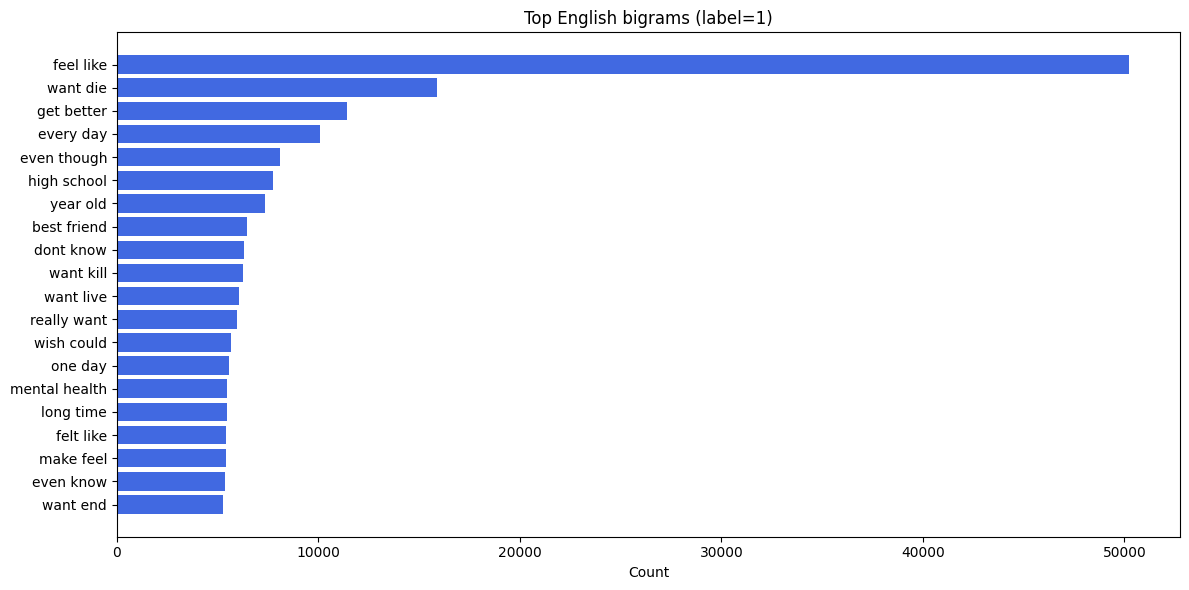

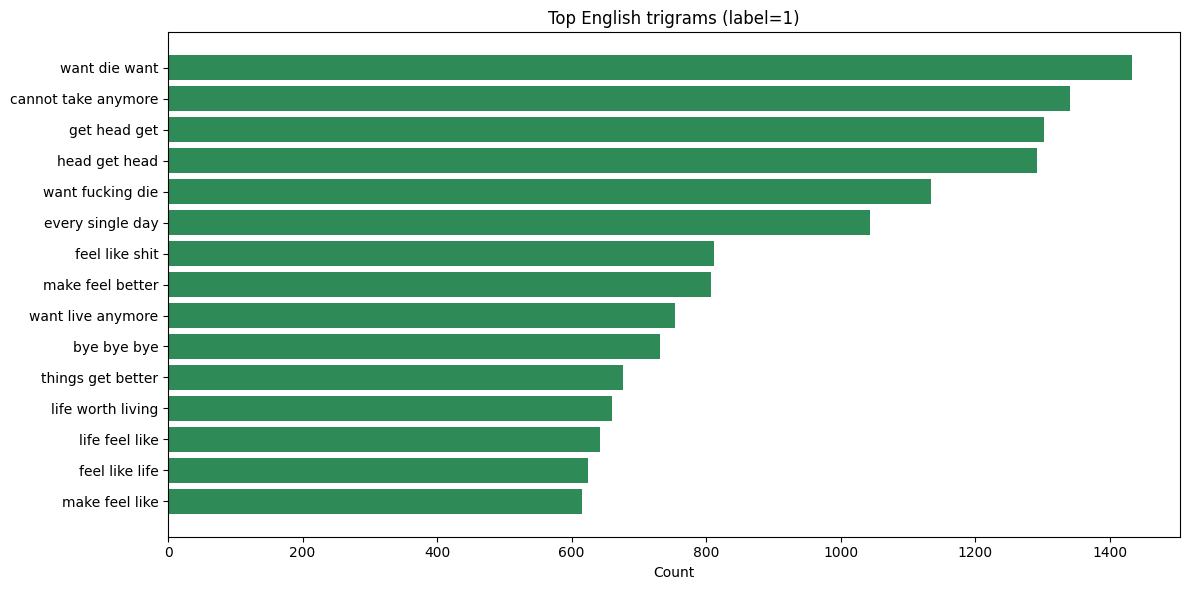

In [92]:
# --- English bigrams and trigrams for suicidal (label=1) posts ---
import matplotlib.pyplot as plt

# Utility: create n-grams from tokens
def to_ngrams(tokens, n=2):
    """
    Generate n-grams (as tuples) from an input list of tokens.
    Returns empty list if not enough tokens.
    """
    if len(tokens) < n:
        return []
    iters = [iter(tokens)] * n
    for i in range(n):
        for _ in range(i):
            next(iters[i], None)
    return list(zip(*iters))

# Count bigrams and trigrams, skipping English stopwords
bigrams_en_1 = Counter()
trigrams_en_1 = Counter()
for toks in df_eng[df_eng["label"] == 1]["tokens"]:
    toks = [t for t in toks if t not in en_stop]
    bigrams_en_1.update(to_ngrams(toks, n=2))
    trigrams_en_1.update(to_ngrams(toks, n=3))

# Print top results
print("Top English bigrams (label=1):")
print(bigrams_en_1.most_common(30))
print("\nTop English trigrams (label=1):")
print(trigrams_en_1.most_common(20))

# --- Visualization of English bigrams & trigrams ---
TOP_N_BIGRAM = 20
TOP_N_TRIGRAM = 15

# Show the top N bigrams as bar plot
top_bigrams = bigrams_en_1.most_common(TOP_N_BIGRAM)
bigram_labels = [' '.join(b) for b, c in top_bigrams]
bigram_counts = [c for b, c in top_bigrams]

plt.figure(figsize=(12, 6))
plt.barh(bigram_labels[::-1], bigram_counts[::-1], color='royalblue')
plt.title('Top English bigrams (label=1)')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# Show the top N trigrams as bar plot
top_trigrams = trigrams_en_1.most_common(TOP_N_TRIGRAM)
trigram_labels = [' '.join(b) for b, c in top_trigrams]
trigram_counts = [c for b, c in top_trigrams]

plt.figure(figsize=(12, 6))
plt.barh(trigram_labels[::-1], trigram_counts[::-1], color='seagreen')
plt.title('Top English trigrams (label=1)')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

## Label Distribution

Label balance for the full dataset and for the Russian-only subset.

In [15]:
# 2.1 Overall label distribution
df["label"].value_counts(), df["label"].value_counts(normalize=True)

(label
 0    390741
 1    384014
 Name: count, dtype: int64,
 label
 0    0.504341
 1    0.495659
 Name: proportion, dtype: float64)

In [16]:
# 2.2 Label distribution for Russian only
df_rus = df[df["language"] == "russian"].copy()
df_rus["label"].value_counts(), df_rus["label"].value_counts(normalize=True)

(label
 0    62166
 1    32168
 Name: count, dtype: int64,
 label
 0    0.658999
 1    0.341001
 Name: proportion, dtype: float64)

In [93]:
df.groupby("language")["label"].value_counts().unstack(fill_value=0)

label,0,1
language,,
eng,328203,351837
kazakh,372,9
russian,62166,32168


## Sources (source, source_link)

Distribution of internal dataset sources and their external links.


In [27]:
df["source"].value_counts(), df["source"].value_counts(normalize=True)

(source
 huggingface_jquiros_suicide_path                       232056
 hf_suicide_prediction_dataset_phr                      231226
 github_reddit_2178_risk_assessment_path                 71276
 mendeley_depressive_suicidal_posts_path                 64028
 huggingface_swmh_path                                   54297
 twitter_presuicidal_signals_path                        32419
 kaggle_reddit_suicidewatch_v2_path                      20345
 kaggle_sentiment_mental_health_path                     16566
 huggingface_suicidal_ideation_detection_reddit_path     15526
 github_rsd_suicide_path                                 14331
 kaggle_suicide_detection_path                            9996
 kaggle_twitter_suicidal_data_path                        8779
 github_siocode_depression_path                           1888
 kaggle_reddit_suicidewatch_path                           976
 huggingface_twitter_suicide_v2_path                       546
 github_reddit_500_suicide_risk_path           

In [28]:
df["source"].value_counts().head(10)

source
huggingface_jquiros_suicide_path                       232056
hf_suicide_prediction_dataset_phr                      231226
github_reddit_2178_risk_assessment_path                 71276
mendeley_depressive_suicidal_posts_path                 64028
huggingface_swmh_path                                   54297
twitter_presuicidal_signals_path                        32419
kaggle_reddit_suicidewatch_v2_path                      20345
kaggle_sentiment_mental_health_path                     16566
huggingface_suicidal_ideation_detection_reddit_path     15526
github_rsd_suicide_path                                 14331
Name: count, dtype: int64

In [29]:
# 4.3 Label distribution per source
source_label = df.groupby("source")["label"].value_counts().unstack(fill_value=0)
source_label.head(10)

label,0,1
source,,
github_reddit_2178_risk_assessment_path,0,71276
github_reddit_500_suicide_risk_path,185,315
github_rsd_suicide_path,5308,9023
github_siocode_depression_path,911,977
hf_suicide_prediction_dataset_phr,115298,115928
huggingface_jquiros_suicide_path,116022,116034
huggingface_suicidal_ideation_detection_reddit_path,8237,7289
huggingface_swmh_path,44136,10161
huggingface_twitter_suicide_v2_path,193,353


In [30]:
# 4.4 Proportion of label 1 per source
(df.groupby("source")["label"].mean()
   .sort_values(ascending=False)
   .head(10))

source
github_reddit_2178_risk_assessment_path    1.000000
kaggle_reddit_suicidewatch_path            1.000000
huggingface_twitter_suicide_v2_path        0.646520
github_reddit_500_suicide_risk_path        0.630000
github_rsd_suicide_path                    0.629614
github_siocode_depression_path             0.517479
hf_suicide_prediction_dataset_phr          0.501362
huggingface_jquiros_suicide_path           0.500026
mendeley_depressive_suicidal_posts_path    0.499906
kaggle_suicide_detection_path              0.495298
Name: label, dtype: float64

In [33]:
# 4.5 Language distribution per source (top few)
lang_source = (df.groupby(["source", "language"])
                 .size()
                 .unstack(fill_value=0))
lang_source.head(30)

language,eng,kazakh,russian
source,,,
github_reddit_2178_risk_assessment_path,71262,1,13
github_reddit_500_suicide_risk_path,500,0,0
github_rsd_suicide_path,14327,0,4
github_siocode_depression_path,1888,0,0
hf_suicide_prediction_dataset_phr,231169,9,48
huggingface_jquiros_suicide_path,232004,5,47
huggingface_suicidal_ideation_detection_reddit_path,15524,0,2
huggingface_swmh_path,54297,0,0
huggingface_twitter_suicide_v2_path,546,0,0


In [37]:
# 5.3 Frequency of special tokens in clean_text
for token in ["<url>", "<email>", "<user>"]:
    count = df["clean_text"].fillna("").str.contains(token).sum()
    print(f"{token}: {count}")

<url>: 0
<email>: 0
<user>: 0


In [44]:
!pip install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


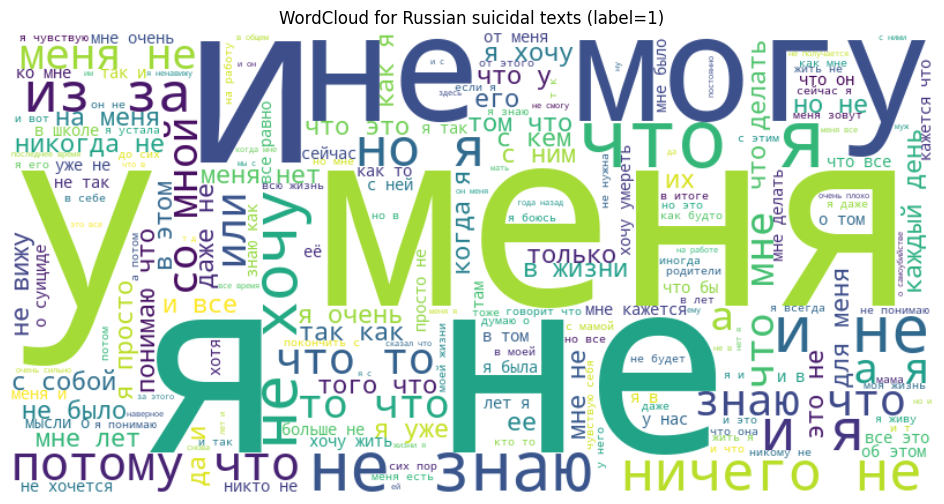

In [ ]:
# Word cloud for Russian suicidal texts (label=1)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_1 = " ".join(df_rus[df_rus["label"] == 1]["clean_text"].dropna().tolist())
wc = WordCloud(width=800, height=400, background_color="white").generate(text_1)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Russian suicidal texts (label=1)")
plt.show()

In [50]:
# Filter to english texts
df_eng = df[df["language"] == "eng"].copy()

In [51]:
df_eng["tokens"] = df_eng["clean_text"].fillna("").str.split()

In [53]:
# 6.2 Most frequent words overall 
from collections import Counter

cnt_all = Counter()
df_eng["tokens"].apply(cnt_all.update)
cnt_all.most_common(50)

[('i', 3690662),
 ('to', 1847736),
 ('and', 1585619),
 ('the', 1229636),
 ('a', 1124220),
 ('my', 1026269),
 ('not', 1017066),
 ('of', 784827),
 ('it', 742937),
 ('that', 649045),
 ('t', 621269),
 ('in', 566754),
 ('me', 517568),
 ('is', 513451),
 ('like', 510561),
 ('but', 505852),
 ('for', 497145),
 ('you', 492362),
 ('have', 483109),
 ('m', 459189),
 ('just', 440120),
 ('want', 432895),
 ('feel', 373572),
 ('so', 372884),
 ('know', 371734),
 ('was', 368378),
 ('this', 364313),
 ('with', 363314),
 ('be', 340164),
 ('get', 331714),
 ('s', 322118),
 ('can', 300348),
 ('on', 284748),
 ('life', 281637),
 ('would', 280397),
 ('do', 275371),
 ('don', 266291),
 ('even', 255887),
 ('people', 253034),
 ('if', 247408),
 ('one', 243842),
 ('or', 241784),
 ('about', 236638),
 ('really', 234686),
 ('time', 229442),
 ('at', 222694),
 ('all', 221892),
 ('what', 221200),
 ('think', 209161),
 ('am', 207701)]

In [54]:
# 6.3 Most frequent words by label
cnt_rus_0 = Counter()
cnt_rus_1 = Counter()

df_eng[df_eng["label"] == 0]["tokens"].apply(cnt_rus_0.update)
df_eng[df_eng["label"] == 1]["tokens"].apply(cnt_rus_1.update)

print("Top words label=0:")
print(cnt_rus_0.most_common(30))

print("\nTop words label=1:")
print(cnt_rus_1.most_common(30))

Top words label=0:
[('i', 1170807), ('to', 569049), ('and', 544699), ('the', 437051), ('a', 404566), ('my', 341093), ('of', 259795), ('it', 259745), ('not', 239808), ('that', 210994), ('in', 193591), ('t', 188383), ('is', 177285), ('like', 175377), ('me', 171862), ('for', 170072), ('but', 166569), ('you', 165656), ('have', 153089), ('m', 144120), ('just', 142951), ('was', 136415), ('so', 134929), ('s', 130705), ('this', 129050), ('with', 128071), ('filler', 109715), ('on', 109334), ('be', 100152), ('know', 99603)]

Top words label=1:
[('i', 2519855), ('to', 1278687), ('and', 1040920), ('the', 792585), ('not', 777258), ('a', 719654), ('my', 685176), ('of', 525032), ('it', 483192), ('that', 438051), ('t', 432886), ('in', 373163), ('me', 345706), ('but', 339283), ('want', 337596), ('is', 336166), ('like', 335184), ('have', 330020), ('for', 327073), ('you', 326706), ('m', 315069), ('just', 297169), ('feel', 283388), ('know', 272131), ('be', 240012), ('so', 237955), ('life', 237945), ('this

In [55]:
# 6.4 Simple bigram frequency 
from itertools import tee, islice

def to_bigrams(tokens):
    a, b = tee(tokens)
    next(b, None)
    return list(zip(a, b))

bigram_counter_1 = Counter()
for toks in df_eng[df_eng["label"] == 1]["tokens"]:
    bigram_counter_1.update(to_bigrams(toks))

bigram_counter_1.most_common(30)

[(('i', 'm'), 300457),
 (('don', 't'), 188163),
 (('and', 'i'), 178493),
 (('i', 'have'), 142026),
 (('i', 'don'), 137063),
 (('want', 'to'), 136674),
 (('i', 'can'), 121709),
 (('but', 'i'), 113278),
 (('i', 'am'), 110473),
 (('i', 'was'), 108271),
 (('i', 've'), 108109),
 (('feel', 'like'), 103132),
 (('that', 'i'), 93292),
 (('i', 'just'), 91833),
 (('can', 't'), 91672),
 (('it', 's'), 88563),
 (('to', 'be'), 88337),
 (('i', 'feel'), 73576),
 (('in', 'the'), 67796),
 (('if', 'i'), 62676),
 (('i', 'want'), 59015),
 (('of', 'my'), 56149),
 (('not', 'know'), 54592),
 (('when', 'i'), 54121),
 (('because', 'i'), 53150),
 (('in', 'my'), 52928),
 (('going', 'to'), 52631),
 (('not', 'want'), 51501),
 (('to', 'do'), 51348),
 (('i', 'know'), 50875)]

In [56]:
# 6.5 Simple trigram frequency 
from itertools import tee

def to_trigrams(tokens):
    a, b, c = tee(tokens, 3)
    next(b, None)
    next(c, None)
    next(c, None)
    return list(zip(a, b, c))

trigram_counter_1 = Counter()
for toks in df_eng[df_eng["label"] == 1]["tokens"]:
    trigram_counter_1.update(to_trigrams(toks))

trigram_counter_1.most_common(30)

[(('i', 'don', 't'), 135972),
 (('i', 'can', 't'), 65815),
 (('i', 'want', 'to'), 44045),
 (('don', 't', 'know'), 40121),
 (('don', 't', 'want'), 37828),
 (('t', 'want', 'to'), 33641),
 (('i', 'feel', 'like'), 33169),
 (('i', 'm', 'not'), 28394),
 (('i', 've', 'been'), 28151),
 (('i', 'just', 'want'), 24001),
 (('and', 'i', 'm'), 23063),
 (('i', 'have', 'no'), 21761),
 (('feel', 'like', 'i'), 20739),
 (('just', 'want', 'to'), 18706),
 (('i', 'm', 'just'), 17537),
 (('don', 't', 'have'), 17473),
 (('t', 'know', 'what'), 16851),
 (('i', 'didn', 't'), 16555),
 (('a', 'lot', 'of'), 16453),
 (('want', 'to', 'be'), 16424),
 (('i', 'have', 'a'), 15443),
 (('i', 'm', 'a'), 14936),
 (('know', 'what', 'to'), 14891),
 (('i', 'm', 'so'), 13936),
 (('and', 'i', 'don'), 13821),
 (('but', 'i', 'm'), 13663),
 (('i', 'm', 'going'), 12772),
 (('i', 'do', 'not'), 12591),
 (('to', 'kill', 'myself'), 12433),
 (('i', 'have', 'to'), 12314)]

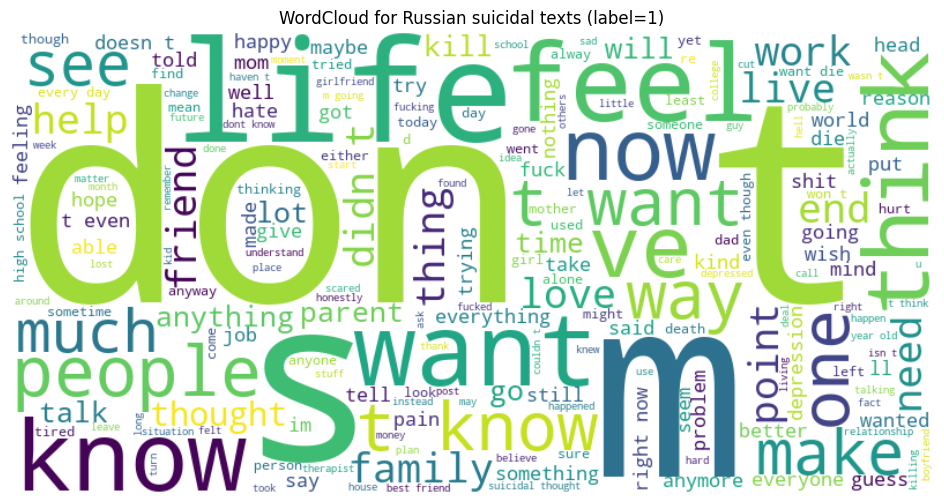

In [ ]:
# Word cloud for English suicidal texts (label=1)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_1 = " ".join(df_eng[df_eng["label"] == 1]["clean_text"].dropna().tolist())
wc = WordCloud(width=800, height=400, background_color="white").generate(text_1)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for English suicidal texts (label=1)")
plt.show()

## Interactions: language × label × source

How language, label, and source interact (e.g., which sources contribute most Russian/English suicidal texts).


In [58]:
# 7.1 Russian suicidal texts by source
rus_suicidal = df[(df["language"] == "russian") & (df["label"] == 1)]
rus_suicidal["source"].value_counts().head(10)

source
mendeley_depressive_suicidal_posts_path                31925
twitter_presuicidal_signals_path                         220
github_reddit_2178_risk_assessment_path                   13
huggingface_jquiros_suicide_path                           4
huggingface_suicidal_ideation_detection_reddit_path        2
hf_suicide_prediction_dataset_phr                          2
kaggle_reddit_suicidewatch_v2_path                         1
kaggle_reddit_suicidewatch_path                            1
Name: count, dtype: int64

In [59]:
# 7.2 English suicidal texts by source
eng_suicidal = df[(df["language"] == "eng") & (df["label"] == 1)]
eng_suicidal["source"].value_counts().head(10)

source
huggingface_jquiros_suicide_path                       116030
hf_suicide_prediction_dataset_phr                      115926
github_reddit_2178_risk_assessment_path                 71262
huggingface_swmh_path                                   10161
kaggle_reddit_suicidewatch_v2_path                       9986
github_rsd_suicide_path                                  9023
huggingface_suicidal_ideation_detection_reddit_path      7287
kaggle_suicide_detection_path                            4951
kaggle_twitter_suicidal_data_path                        3956
github_siocode_depression_path                            977
Name: count, dtype: int64

In [60]:
# 7.3 Russian texts label distribution by source
(df_rus.groupby("source")["label"]
       .value_counts()
       .unstack(fill_value=0)
       .head(10))

label,0,1
source,,
github_reddit_2178_risk_assessment_path,0,13
github_rsd_suicide_path,4,0
hf_suicide_prediction_dataset_phr,46,2
huggingface_jquiros_suicide_path,43,4
huggingface_suicidal_ideation_detection_reddit_path,0,2
kaggle_reddit_suicidewatch_path,0,1
kaggle_reddit_suicidewatch_v2_path,0,1
kaggle_sentiment_mental_health_path,24,0
kaggle_twitter_suicidal_data_path,4,0


In [61]:
# 7.4 English texts label distribution by source
(df_eng.groupby("source")["label"]
       .value_counts()
       .unstack(fill_value=0)
       .head(10))

label,0,1
source,,
github_reddit_2178_risk_assessment_path,0,71262
github_reddit_500_suicide_risk_path,185,315
github_rsd_suicide_path,5304,9023
github_siocode_depression_path,911,977
hf_suicide_prediction_dataset_phr,115243,115926
huggingface_jquiros_suicide_path,115974,116030
huggingface_suicidal_ideation_detection_reddit_path,8237,7287
huggingface_swmh_path,44136,10161
huggingface_twitter_suicide_v2_path,193,353


In [ ]:
# 7.5 Average length (words) by language and label
(df.groupby(["language", "label"])["len_words"]
   .mean()
   .unstack())

label,0,1
language,,
eng,70.456797,138.201417
kazakh,14.282258,5.555556
russian,99.806808,122.457193
